<h2>Import Necessary Libraries</h2>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# get the dataset
path=r"/content/heart.txt"
df=pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [6]:
df.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


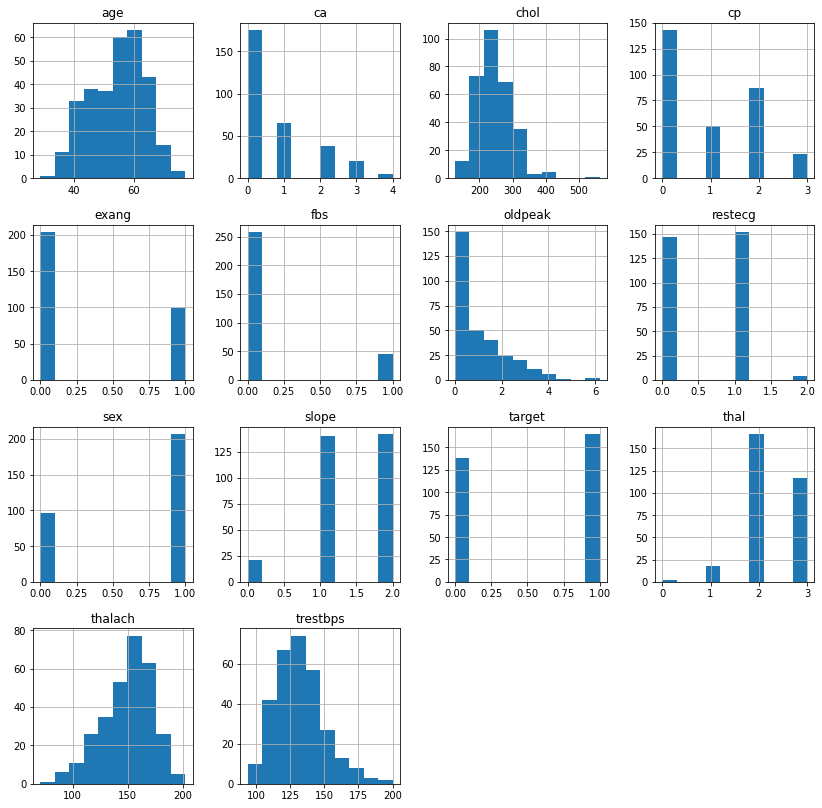

In [8]:
#visualize the plot using histograms
df.hist(figsize=(14,14))
plt.show()

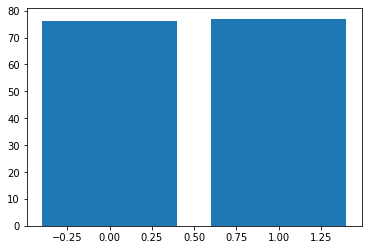

In [11]:
#visualize the plot using bar plots
plt.bar(x=df['sex'],height=df['age'])
plt.show()

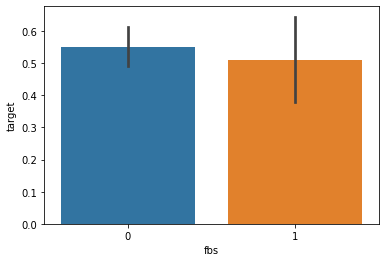

In [12]:
sns.barplot(x="fbs", y="target", data=df)
plt.show()

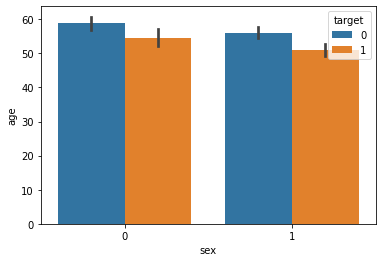

In [13]:
sns.barplot(x=df['sex'],y=df['age'],hue=df['target'])

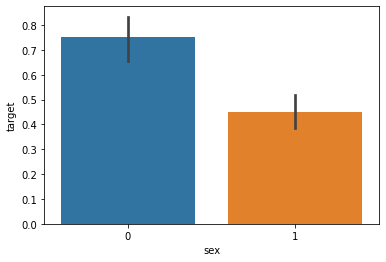

In [15]:
sns.barplot(df["sex"],df['target'])

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


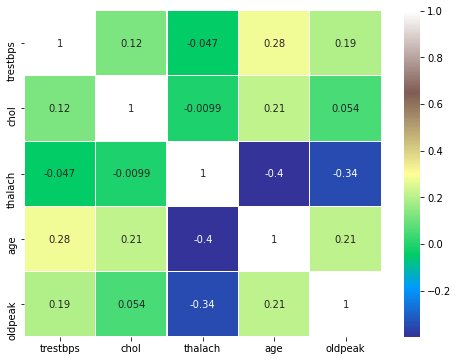

In [19]:
# Created a Confusion Matrix
numerical_values=['trestbps','chol','thalach','age','oldpeak']
sns.heatmap(df[numerical_values].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

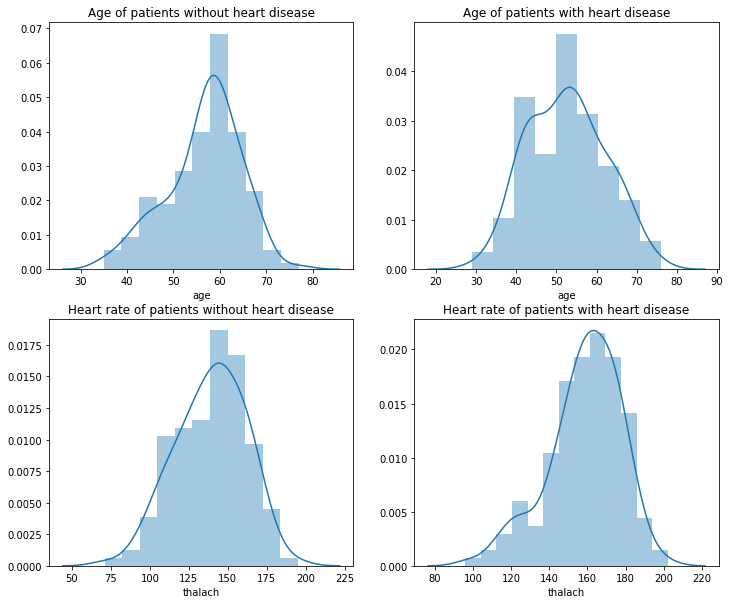

In [22]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Heart rate of patients with heart disease')
plt.show()

In [23]:
df['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Setting values for X and Y for training and testing
X=df.loc[:,:'thal']
y=df.loc[:,'target']

In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X=df.drop(['target'],axis=1)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.2)

Decision Tree Classifier Algorithm

In [34]:
from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
prediction=dc.predict(X_test)
accuracy_dc=accuracy_score(y_test,prediction)*100
accuracy_dc

78.68852459016394

In [38]:
prediction

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [39]:
hd=['No, you do not have heart disease','Yes you have Heart Disease']

In [42]:
val=np.array([[34 ,1, 3,154,133,1,0,250,0,2.3,0,0,1]])
val_prediction=dc.predict(val)

In [43]:
val_prediction[0]

1

In [45]:
print(hd[int(val_prediction[0])])

Yes you have Heart Disease


K Neighbor Classifier Algorithm

In [48]:

sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.55737705, 0.50819672, 0.60655738, 0.55737705, 0.6557377 ,
       0.62295082, 0.63934426, 0.62295082, 0.6557377 ])

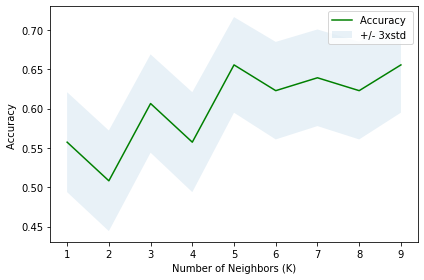

In [63]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [64]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
accuracy_knn

81.9672131147541

In [67]:
X_knn=np.array([[75 ,1, 3,156,244,1,0,165,0,2.3,0,0,1]])
X_knn_std=sc.transform(X_knn)
X_knn_prediction=dc.predict(X_knn)

In [68]:
X_knn_std

array([[ 2.27433291,  0.64436378,  2.01240764,  1.43855598, -0.02673044,
         2.56173769, -1.00223951,  0.73477294, -0.70929937,  1.0149813 ,
        -2.2832326 , -0.77069847, -2.10943961]])

In [69]:
(X_knn_prediction[0])

1

In [70]:
print(hd[int(X_knn_prediction[0])])

Yes you have Heart Disease


In [72]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dc,accuracy_knn]

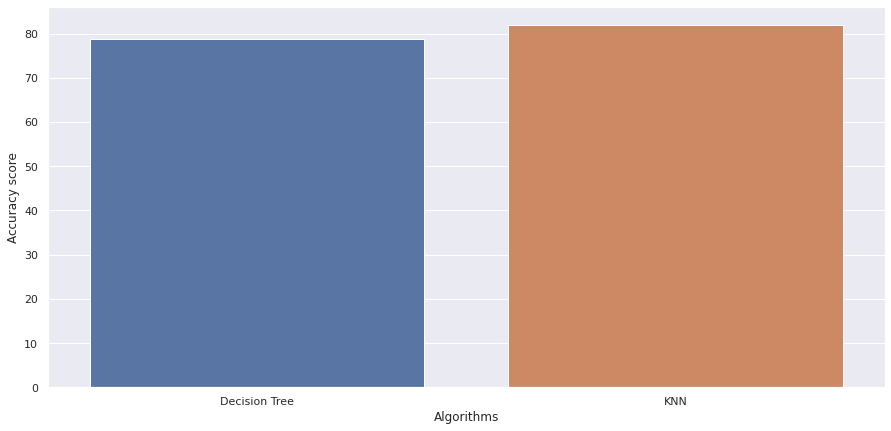

In [73]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)